In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
import altair as alt
import altair_nx as anx

# Visualizing community structure and prestige in the Florentine families

#### Original example by [Mike Trenfield](https://github.com/mtrenfield/)

When visualizing networks, one often wants to be able to quickly determine identities of nodes, relative importances of nodes within in the network, and identify community structure.
Here we see how altair_nx makes it simple to create a visualization that communicates all three of these in a single, easy-to-create chart.

As an example, we will use the [Florentine families dataset](http://www.casos.cs.cmu.edu/computational_tools/datasets/external/padgett/index2.html) that ships with networkx.  The nodes represent families and the edges represent marriage and business between them.

### Loading and drawing the data with networkx

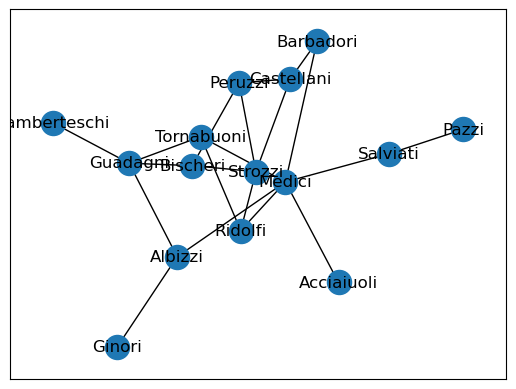

In [16]:
G = nx.florentine_families_graph()
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)

### Adding community structure and centrality

To help us interpret this network, we'll use networkx's implementation of a [label propagation algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html#networkx.algorithms.community.label_propagation.label_propagation_communities) to partition the nodes into communities and [eigenvetor centrality](https://en.wikipedia.org/wiki/Eigenvector_centrality) to assign a measure of importance to each node in the network.

In [17]:
communities = {family: str(i) for i, community in enumerate(nx.community.label_propagation_communities(G)) for family in community}
centralities = nx.eigenvector_centrality(G)

nx.set_node_attributes(G, {f: dict(community = communities[f], centrality = centralities[f], name = f) for f in G.nodes()})

### Putting it all together with altair_nx

Now it only takes a single function call to create a chart where nodes are colored by community, sized by centrality, and we can hover over nodes to see their identities.  Notice the Medici family is the largest node.

In [18]:
chart = anx.draw_networkx(G, pos,
    node_size = 'centrality', node_colour = 'community', node_cmap = 'accent',
    node_tooltip = ['name', 'centrality', 'community']
)

chart

alt.LayerChart(...)